# Approved or Denied: Predicting Loans

## Introduction

There are many different factors that go into whether a person will be approved or denied for a loan. Some factors that come to mind are job status, credit history, income and the size of the loan. The company that has produced this dataset wants to automate loan approval. So using the factors that they have provided, I will create a prediction model that will accurately predict whether a person will be approved or denied for a loan.

## Exploring the Dataset

### Preparing Data for Analysis

In [866]:
#Load Modules
#Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Machine Learning
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

#Importing Data
train_data = pd.read_csv('train-file.csv')
test_data = pd.read_csv('test-file.csv')
ID = test_data['Loan_ID']

#Creating Datasets 
loan_full = train_data.append(test_data)
loan_full = loan_full.drop('Loan_ID', axis = 1)
loan_data = loan_full[:614]
test = loan_full[614:]

Here I have imported the modules into Python that I will use throughout this report. Additionally I have imported the train and test data. The train data will be used to build the model. The test data will be used to test the predictions. If the model does well when predicting loan approval in the test set, then it would be good to use to automate the loan approval process. In this step, I have also extracted the `Loan_ID` column from the test data and stored it in the variable `ID`. This column will be used in the final predictions as an identifying variable.

In order to perform the analysis, I have combined the train data and the test data. I combined these two data sets because there will be some feature engineering and feature selection that will be performed the training data. These transformations need to also be applied to the test set because variables need to be the same so that the predictions can be performed in the end. After I combined the train and test sets, I dropped the `Loan_ID` column because this column will have zero variance and not contribute any insights to the analysis. Next the combined dataset was stored in the variable `loan_full` and then separated into train and test data and stored in the variables `loan_data` and `test` respectively.

### Previewing the Data

#### Train Sample

In [867]:
#Sampling train data for inspection
loan_data.sample(10)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
241,2510,1983.0,1.0,1,Not Graduate,Male,140.0,180.0,N,Yes,Urban,No
222,2971,2791.0,1.0,0,Graduate,Male,144.0,360.0,Y,No,Semiurban,No
447,3539,1376.0,1.0,0,Graduate,Male,55.0,360.0,N,Yes,Rural,NaN
86,3333,2000.0,NaN,2,Not Graduate,Male,99.0,360.0,Y,Yes,Semiurban,No
259,4931,0.0,NaN,3+,Not Graduate,Male,128.0,360.0,N,Yes,Semiurban,No
424,14880,0.0,1.0,0,Graduate,Male,96.0,360.0,Y,Yes,Semiurban,No
468,210,2917.0,1.0,2,Not Graduate,Female,98.0,360.0,Y,Yes,Semiurban,NaN
25,9560,0.0,1.0,0,Graduate,Male,191.0,360.0,Y,Yes,Semiurban,Yes
280,4053,2426.0,0.0,1,Not Graduate,Male,158.0,360.0,N,No,Urban,Yes
163,4167,1447.0,1.0,2,Graduate,Male,158.0,360.0,Y,Yes,Rural,No


#### Train Info

In [868]:
#Getting Info on train data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
Credit_History       564 non-null float64
Dependents           599 non-null object
Education            614 non-null object
Gender               601 non-null object
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Loan_Status          614 non-null object
Married              611 non-null object
Property_Area        614 non-null object
Self_Employed        582 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


#### Test Sample

In [869]:
#Sampling the test data for inspection
test.sample(10)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
126,6500,0.0,0.0,0,Graduate,Male,71.0,360.0,NaN,No,Urban,No
71,4463,0.0,1.0,0,Graduate,Male,65.0,360.0,NaN,No,Semiurban,No
262,3417,738.0,NaN,0,Graduate,Male,100.0,360.0,NaN,No,Rural,No
330,5509,0.0,1.0,0,Graduate,Male,143.0,360.0,NaN,Yes,Rural,No
52,3500,3077.0,1.0,1,Graduate,Male,160.0,360.0,NaN,Yes,Semiurban,No
156,4246,4246.0,1.0,2,Graduate,Male,214.0,360.0,NaN,Yes,Urban,Yes
333,4709,0.0,1.0,0,Graduate,Female,113.0,360.0,NaN,Yes,Semiurban,No
116,0,1760.0,1.0,0,Not Graduate,Female,180.0,360.0,NaN,No,Semiurban,No
301,6300,0.0,0.0,1,Graduate,Male,125.0,360.0,NaN,Yes,Urban,NaN
217,7830,2183.0,1.0,0,Graduate,Male,212.0,360.0,NaN,Yes,Rural,No


#### Test Info

In [870]:
#Getting info on the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 12 columns):
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null float64
Credit_History       338 non-null float64
Dependents           357 non-null object
Education            367 non-null object
Gender               356 non-null object
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Loan_Status          0 non-null object
Married              367 non-null object
Property_Area        367 non-null object
Self_Employed        344 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 37.3+ KB


In this step, I have previewed the data in order to get a sense of it. The initial inspection shows that there are 12 variables for both the train and the test set. The variables are `ApplicantIncome`, `CoapplicantIncome`, `Credit_History`, `Dependents`, `Education`, `Gender`, `LoanAmount`, `Loan_Amount_Term`, `Loan_Status`, `Married`, `Property_Area`, and `Self_Employed`. In the train set, each of these variables has 614 entries. In the test set, they have 367 entries. There are some missing values in both the train and the test set but they will be handled in a future step. The missing values in `Loan_Status` will be ignored in the test set since that is what I'm trying to predict.

## Cleaning the Data

### Changing Data Types

In [871]:
#Changing numeric variables into categorical variables
loan_full['Credit_History'] = loan_full['Credit_History'].astype('object')
loan_full['Loan_Amount_Term'] = loan_full['Loan_Amount_Term'].astype('object')

#Changing ApplicantIncome to a float
loan_full['ApplicantIncome'] = loan_full['ApplicantIncome'].astype('float')

#Changing LoanAmount variable
loan_full['LoanAmount'] = loan_full['LoanAmount'] * 1000

#Partitioning the Data
loan_data = loan_full[:614]
test = loan_full[614:]

The variables `Credit_History` and `Loan_Amount_Term` are stored as numeric variables. However they should be represented as categorical variables. `Credit_History` is either 1 or 0 depending on whether the person has good credit or not. `Loan_Amount_Term` is a number but is seperated into different increments. One of the increments being 360, which represents a 30 year loan. For the purpose of this analysis, it is best to represent this feature as a categorical feature. As for the `ApplicantIncome` variable, I've decided to change it to a float so that it is the same data type as the other numeric variables. These variables also represent some sort of income. Finally, I multiplied the values in the `LoanAmount` column by 1000 because according to the data description these values are recorded in the thousands. This move scales the data so that all income variables are identical. Of course these transformations were made to the complete dataset so that they could be made on both the train and the test sets. After the changes, the data is again partitioned into train set and test set.

### Finding Missing Values

#### Total MIssing Values per Column

In [872]:
#Finding how many missing values are in each column
missing_values_count = loan_data.isnull().sum()
missing_values_count

ApplicantIncome       0
CoapplicantIncome     0
Credit_History       50
Dependents           15
Education             0
Gender               13
LoanAmount           22
Loan_Amount_Term     14
Loan_Status           0
Married               3
Property_Area         0
Self_Employed        32
dtype: int64

#### Percentage Missing Values per Column

In [873]:
#Finding percentage of missing values are in each column
missing_values_percent = loan_data.isnull().sum()/loan_data.shape[0] * 100
missing_values_percent

ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Credit_History       8.143322
Dependents           2.442997
Education            0.000000
Gender               2.117264
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Loan_Status          0.000000
Married              0.488599
Property_Area        0.000000
Self_Employed        5.211726
dtype: float64

#### Percentage Missing Values in Entire Dataset

In [874]:
#Finding percent of missing values in entire dataset
total_cells = np.product(loan_data.shape)
total_missing = missing_values_count.sum()

(total_missing/total_cells) * 100

2.0222584147665579

Now I'm trying to find missing values in the dataset. The columns that are missing the most data are `Credit_History`, `LoanAmount`, and `Self_Employed`. Of course the question to be asked is, why is the data missing. I'm assuming that this data was collected from loan applications. Some of the data can be missing because people neglected to fill out certain parts. However, these values are missing, but they should exist. Therefore I will impute them. 

### Filling Missing Categorical Data

#### Separating Data into Categorical and Numerical

In [875]:
#Separating Data into Categorical and Numeric Variables
categorical = loan_data.select_dtypes(include = ['object']).columns
numerical = loan_data.select_dtypes(exclude = ["object"]).columns
print('Categorical: ' + str(len(categorical)))
print('Numerical: ' + str(len(numerical)))

Categorical: 9
Numerical: 3


#### Imputing 'MISSING' for Categorical Data

In [876]:
#Imputing 'MISSING' for missing categorical data
for feature in loan_full[categorical]:
        loan_full[feature] = loan_full[feature].astype('category')
        if loan_full[feature].isnull().any():
            loan_full[feature] = loan_full[feature].cat.add_categories(['MISSING'])
            loan_full[feature] = loan_full[feature].fillna('MISSING')

#### Confirming Changes

In [877]:
#Partioning Data and checking if values were imputed
loan_data = loan_full[:614]
test = loan_full[614:]
loan_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
ApplicantIncome      981 non-null float64
CoapplicantIncome    981 non-null float64
Credit_History       981 non-null category
Dependents           981 non-null category
Education            981 non-null category
Gender               981 non-null category
LoanAmount           954 non-null float64
Loan_Amount_Term     981 non-null category
Loan_Status          981 non-null category
Married              981 non-null category
Property_Area        981 non-null category
Self_Employed        981 non-null category
dtypes: category(9), float64(3)
memory usage: 40.9 KB


The analysis reveals that most of the missing data is missing in categorical variables. Since in a future step I am going to encode the categorical variables for analysis and for machine learning, I filled missing categorical values with the word 'MISSING'. This will create and encode an extra category for these variables and track which ones were missing. If you're following this report then you can see that now there is only one column that has missing values. Once again, these transformations were done on the complete dataset. So again, I will partition the data with the new changes. If you're wondering about the numeric data, I would like to analyze the data as it is and impute these values later in preparation for the machine learning phase of the project.

## Analyzing the Data

### Analyzing Numeric Data

#### Describe Spread

In [878]:
#Checking the spread of the numeric data
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146412.162162
std,6109.041673,2926.248369,85587.325236
min,150.000000,0.000000,9000.000000
25%,2877.500000,0.000000,100000.000000
50%,3812.500000,1188.500000,128000.000000
75%,5795.000000,2297.250000,168000.000000
max,81000.000000,41667.000000,700000.000000


#### Histogram Spread

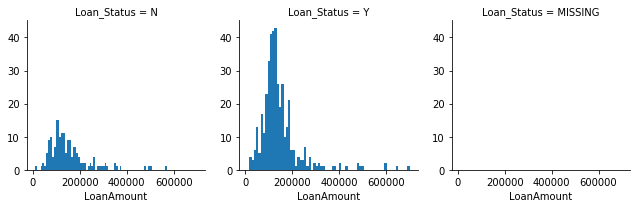

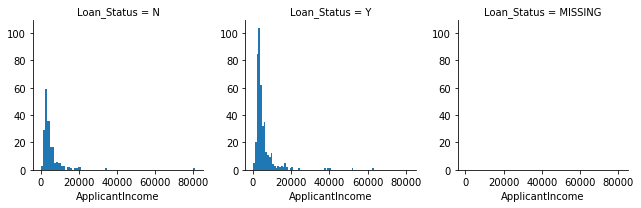

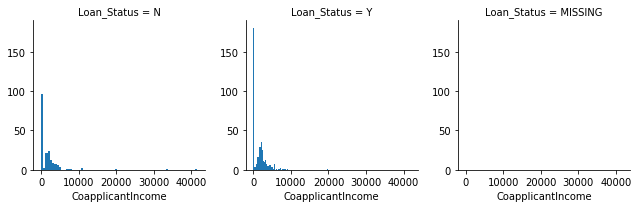

In [879]:
#Graphing to check the spread of the LoanAmount Variable
loan_amount = sns.FacetGrid(loan_data, col='Loan_Status')
loan_amount.map(plt.hist, 'LoanAmount', bins=70)

#Graphing to check the spread of the ApplicantIncome Variable
applicant = sns.FacetGrid(loan_data, col='Loan_Status')
applicant.map(plt.hist, 'ApplicantIncome', bins=70)

#Graphing to check the spread of the CoapplicantIncome Variable
coapplicant = sns.FacetGrid(loan_data, col='Loan_Status')
coapplicant.map(plt.hist, 'CoapplicantIncome', bins=70)

#### Number of Applications with No Coapplicant

In [880]:
#Finding number of applications with no coapplicant
print('No coapplicant income: ' + str(loan_data[loan_data['CoapplicantIncome'] == 0].shape[0]))

No coapplicant income: 273


#### Transforming Skewed Data

In [881]:
#Transforming skewed numerical data
skewed = loan_full[numerical].apply(lambda x: stats.skew(x.dropna()))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
loan_full[skewed] = np.log1p(loan_full[skewed])

#Partioning the Data
loan_data = loan_full[:614]
test = loan_full[614:]
loan_data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
0,8.674197,0.000000,1,0,Graduate,Male,NaN,360,Y,No,Urban,No
1,8.430327,7.319202,1,1,Graduate,Male,11.759793,360,N,Yes,Rural,No
2,8.006701,0.000000,1,0,Graduate,Male,11.097425,360,Y,Yes,Urban,Yes
3,7.857094,7.765993,1,0,Not Graduate,Male,11.695255,360,Y,Yes,Urban,No
4,8.699681,0.000000,1,0,Graduate,Male,11.856522,360,Y,No,Urban,No


#### Histograms after Tranformation

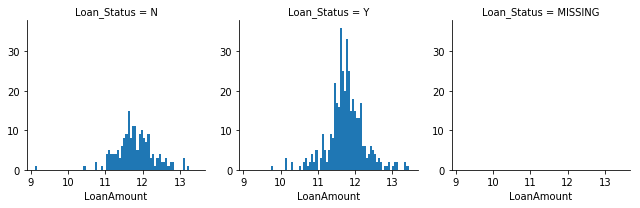

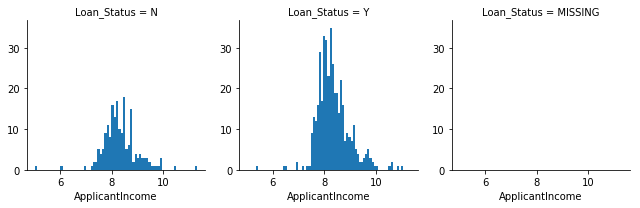

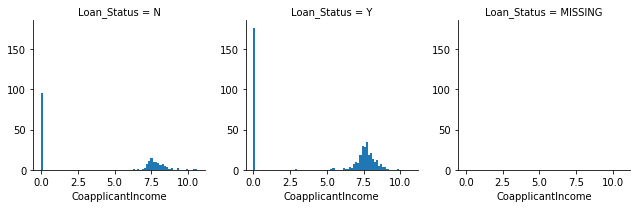

In [882]:
#Plotting Loan Amount Histogram
loan_amount = sns.FacetGrid(loan_data, col='Loan_Status')
loan_amount.map(plt.hist, 'LoanAmount', bins=70)

#Plotting ApplicantIncome Histogram
loan_amount = sns.FacetGrid(loan_data, col='Loan_Status')
loan_amount.map(plt.hist, 'ApplicantIncome', bins=70)

#Plotting Coapplicant Income Histogram
loan_amount = sns.FacetGrid(loan_data, col='Loan_Status')
loan_amount.map(plt.hist, 'CoapplicantIncome', bins=70)

Looking at the initial chart shows us the spread of the data. It is broken down into quantiles and show the mean and standard deviation of each numeric variable. When looking at the numerical data I find that all of the numeric variables are positively skewed. Most of the values are on the lower end of the spectrum with some that are in the high end. In order to find relationships between the variables and for the purpose of the machine learning phase, I am going to transform the skewed data. I transform this data by doing a log plus 1 transformation. There is a large spike at zero for coapplicant income. This fact makes sense since there are people that do not have coapplicants. Once again, the transformation is applied to the full dataset and then partitioned into train and test sets. After the transformation occurs, the numeric variables are closer to be normally distributed. 

### Analyzing All Data Types

#### Encoding Categorical Variables

In [883]:
#Encoding Categorical Variables by Changing to Category type and then getting the codes
for feature in loan_full[categorical]:
    loan_full[feature] = loan_full[feature].astype('category')
    loan_full[feature] = loan_full[feature].cat.codes

#Partitioning Data
loan_data = loan_full[:614]
test = loan_full[614:]

#Checking the changes
loan_data[categorical].head()

,Credit_History,Dependents,Education,Gender,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
0,1,0,0,1,10,1,0,2,0
1,1,1,0,1,10,0,1,0,0
2,1,0,0,1,10,1,1,2,1
3,1,0,1,1,10,1,1,2,0
4,1,0,0,1,10,1,0,2,0


#### Correlation Matrix

Text(0.5,1,'Loan Status Correlation Matrix')

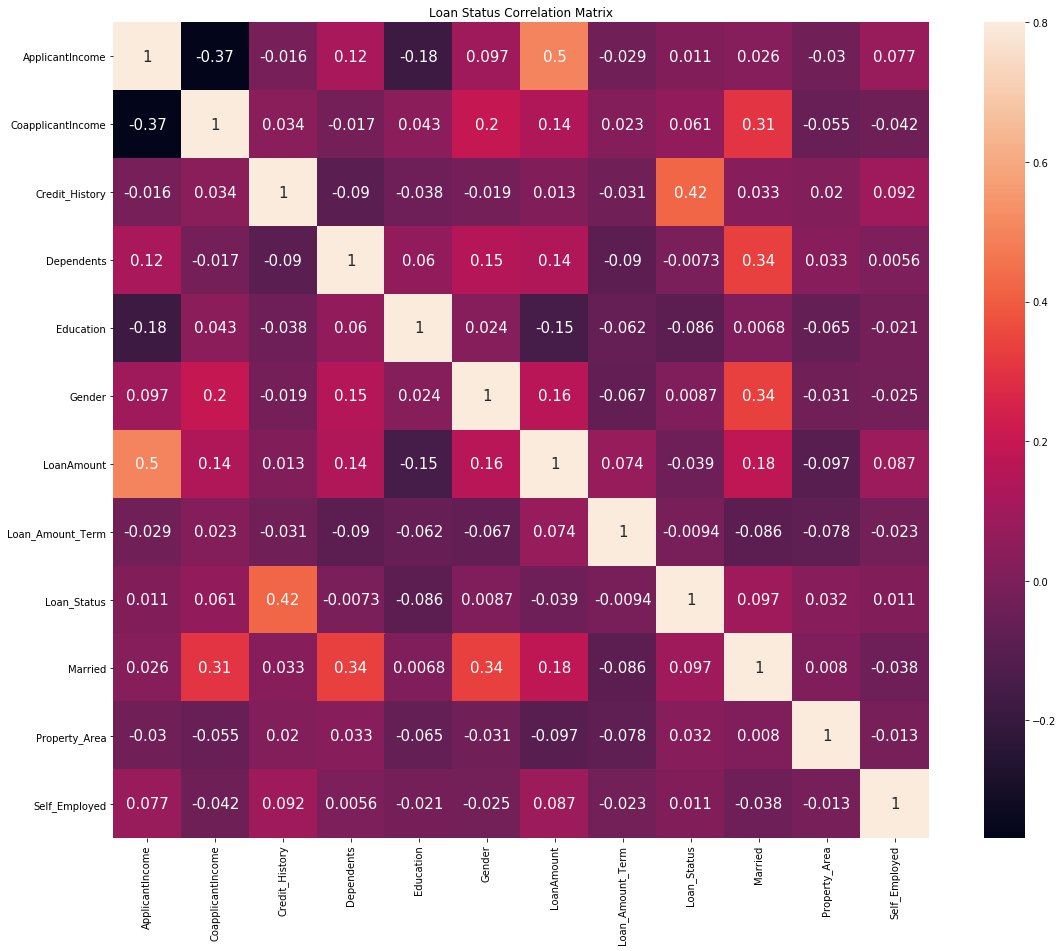

In [884]:
#Getting Correlation Matrix to find Relationships in the Data
corr_matrix = loan_data.corr()
f, ax = plt.subplots(figsize=(20,15))
corr_graph = sns.heatmap(corr_matrix, vmax=0.8, square=True, annot = True,
                        annot_kws = {'fontsize' : 15})
corr_graph.set_title('Loan Status Correlation Matrix')

#### Scatter Plots of Income

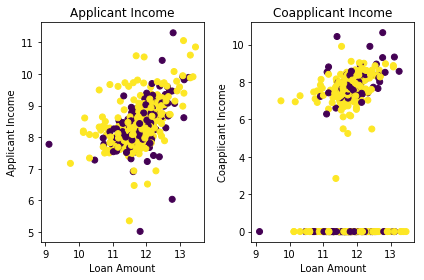

In [885]:
#Scatter Plot of Applicant Income vs.  Loan Amount
plt.subplot(1, 2, 1)
plt.title('Applicant Income')
plt.xlabel('Loan Amount')
plt.ylabel('Applicant Income')
plt.scatter(loan_data['LoanAmount'], loan_data['ApplicantIncome'], c=loan_data['Loan_Status'])

#Scatter plot of Coapplicant Income vs. Loan Amount
plt.subplot(1, 2, 2)
plt.title('Coapplicant Income')
plt.xlabel('Loan Amount')
plt.ylabel('Coapplicant Income')
plt.scatter(loan_data['LoanAmount'], loan_data['CoapplicantIncome'], c=loan_data['Loan_Status'])

plt.tight_layout()
plt.show()

In this step, I've encoded the categorical variables. After I encoded them I was able to make a correlation matrix containing the relationships between the variables. The variable that seems most correlated with `Loan_Status` is `Credit_History`. There doesn't seem to be any strong correlations with the other variables though. Some variables have small correlations with each other, but none holding much weight. The scatterplots show the correlations between Applicant Income, Coapplicant Income and Loan Amount. The correlation matrix may not show the slight positive correlation between Coapplicant Income and Loan Amount because of all the 0's due to those who did not have coapplicants. 

## Feature Engineering and Selection

### Imputing the Mean

In [886]:
#Imputing mean
loan_full = loan_full.fillna(loan_full.mean())

### Adding Features

In [887]:
#Creating New Features from the Data
loan_full['TotalIncome'] = loan_full['ApplicantIncome'] + loan_full['CoapplicantIncome']
loan_full['IncomeRatio'] = loan_full['ApplicantIncome']/loan_full['LoanAmount']
loan_full['TotalIncomeRatio'] = loan_full['TotalIncome']/loan_full['LoanAmount']
loan_full['HasCoapplicant'] = loan_full['CoapplicantIncome'].apply(lambda x: 1 if x > 0 else 0)
loan_full['HasDependents'] = loan_full['Dependents'].apply(lambda x: 1 if x > 0 else 0)

### Selecting Features

In [888]:
#Removing Unnecssary Features
loan_full = loan_full.drop(['LoanAmount', 'Loan_Amount_Term', 'Education', 'Gender', 'ApplicantIncome', 
                            'CoapplicantIncome', 'Dependents', 'Self_Employed', 'TotalIncome'], axis=1)

#Partitioning the Data
loan_data = loan_full[:614]
test = loan_full[614:]

### Inspecting New Dataset

#### Dataset Sample

In [889]:
#Getting Sample of New Dataset
loan_data.sample(10)

,Credit_History,Loan_Status,Married,Property_Area,IncomeRatio,TotalIncomeRatio,HasCoapplicant,HasDependents
160,1,1,1,1,0.655238,1.259872,1,0
299,1,0,1,2,0.653913,1.339885,1,1
312,1,1,0,0,0.715920,0.715920,0,0
231,1,1,1,0,0.772224,0.772224,0,0
11,1,1,1,2,0.674573,1.322731,1,1
458,1,1,0,0,0.708865,0.708865,0,1
443,1,1,0,1,0.883193,0.883193,0,1
283,1,1,0,2,0.688479,1.369303,1,0
173,1,1,1,1,0.712570,1.423934,1,0
210,1,0,0,1,0.750419,0.750419,0,0


#### Dataset Info

In [890]:
#Getting Info for New Dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 8 columns):
Credit_History      614 non-null int8
Loan_Status         614 non-null int8
Married             614 non-null int8
Property_Area       614 non-null int8
IncomeRatio         614 non-null float64
TotalIncomeRatio    614 non-null float64
HasCoapplicant      614 non-null int64
HasDependents       614 non-null int64
dtypes: float64(2), int64(2), int8(4)
memory usage: 26.4 KB


#### Exploring Relationships with New Features

Text(0.5,1,'Loan Status Correlation Matrix')

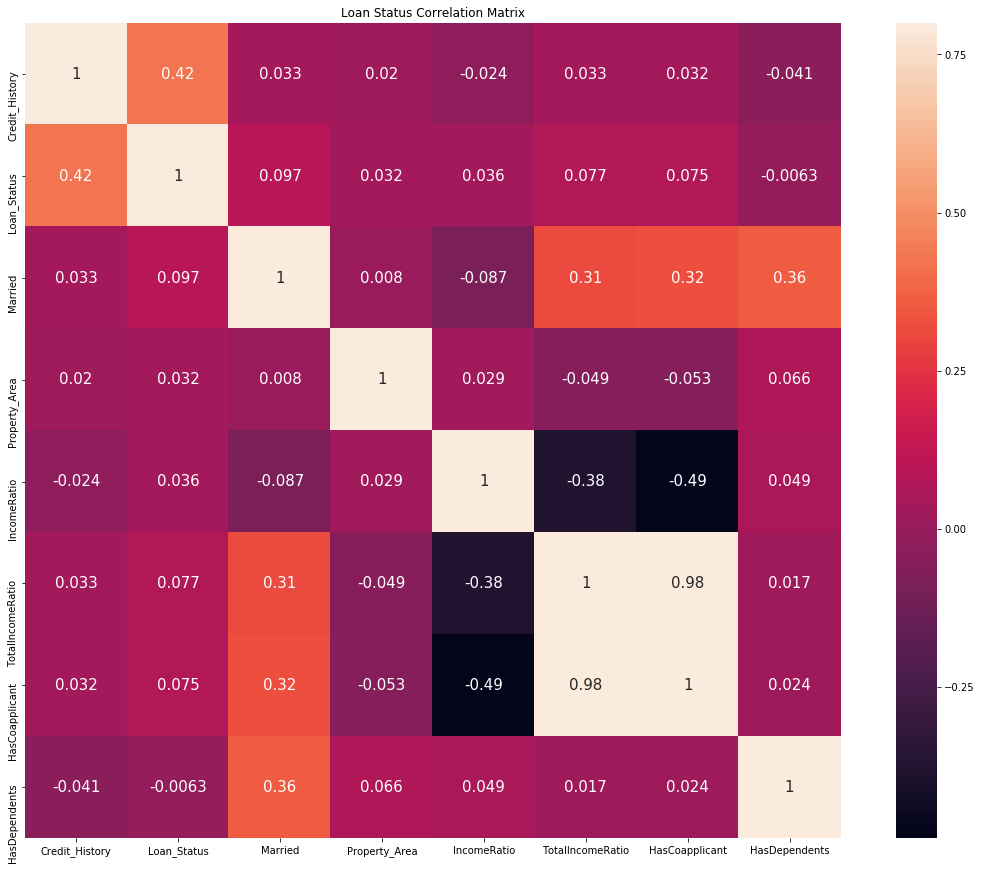

In [891]:
#Getting Correlation Matrix for New Dataset
corr_matrix = loan_data.corr()
f, ax = plt.subplots(figsize=(20,15))
corr_graph = sns.heatmap(corr_matrix, vmax=0.8, square=True, annot = True,
                        annot_kws = {'fontsize' : 15})
corr_graph.set_title('Loan Status Correlation Matrix')

Now it's time to select and engineer some features in preparation of the machine learning phase. Before changing the dataset, we will impute the mean for all missing values. The analysis phase is over and now I will be focusing on machine learning. 5 new features are added. These features are `Total_Income` which is the total of applicant and coapplicant income, `Income_Ratio` which is the ratio of applicant income to loan amount, `TotalIncomeRatio` which is the ratio of total income to loan amount, `HasCoapplicant` which shows whether the applicant has a coapplicant or not, and `HasDependents` which shows whether the applicant has dependents or not. 
 
In addition to adding new features, I also subtracted some variables. The variables that are taken away are `LoanAmount`, `Loan_Amount_Term`, `Education`, `Gender`, `ApplicantIncome`, `CoapplicantIncome`, `Dependents`, `Self_Employed`, and `TotalIncome`. All of these features have little correlation with `Loan_Status`, thus they can be omitted. Even with the feature engineering and selection, only `Credit_History` has a strong correlation with `Loan_Status`. However, only the features `Credit_History`, `Married`, `Property_Area`, `IncomeRatio`, `TotalIncomeRatio`, `HasCoapplicant`, and `HasDependents` will be used in the train set of this model.   

## Making Predictions

### Building Model

#### Separating Target and Predictor Variables

In [906]:
#Separating Data into Target and Predictor Variables
X = loan_data.drop(['Loan_Status'], axis = 1)
Y = loan_data['Loan_Status']

#### Partitioning Data into Train and Test Sets

In [893]:
#Separating the model into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size = 0.3, random_state = 36)

#### Logreg Model

In [894]:
#Making LogReg Model and Validating It
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.420000000000002

##### Impact of Variables

In [895]:
#Checking correlations of LogReg Model
coeff_df = pd.DataFrame(loan_data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
0,Loan_Status,1.882450
1,Married,0.438323
5,HasCoapplicant,0.122886
3,IncomeRatio,0.044639
2,Property_Area,-0.012769
4,TotalIncomeRatio,-0.097350
6,HasDependents,-0.180508


#### SVC Model

In [896]:
#Making SVC Model and Validating It
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

80.420000000000002

#### KNN Model

In [897]:
#Making KNN Model and Validating It
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.780000000000001

#### Gaussian Model

In [898]:
#Making Gaussian Model and Validating It
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.019999999999996

#### Linear SVC Model

In [899]:
#Making Linear SVC Model and Validating It
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.420000000000002

#### Decision Tree

In [900]:
#Making Decision Tree Model and Validating it
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

#### Random Forest

In [901]:
#Making Random Forest Model and Validating it
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

#### Model Comparison

In [902]:
#Making Dataframe of Models and their Scores
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Linear SVC', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
6,Decision Tree,100.00
1,KNN,85.78
0,Support Vector Machines,80.42
2,Logistic Regression,80.42
5,Linear SVC,80.42
4,Naive Bayes,79.02


Finally, I performed the machine learning phase of the project. First, I separated the data into target variable and predictor variables and stored them in the Python variables `Y` and `X`. Then I separated the data into train and test sets. After that, I plugged the train set into various machine learning algorithms. Next, I built the models and validated them by checking their accuracy against the partitioned test data. I then put the validation scores in a dataframe and arranged them by score. The Random Forest and the Decision Tree models performed the best. Some model tuning may improve the scores, but since the Random Forest and Decision Tree models both scored 100%, I decided to skip this step. Once all of this was finished, I predicted the target variable in the original test set. These predictions were the point of the whole process and the model proved well when predicting them. The company that produced this dataset would do well when using this model to automate the loan approval process.

## Final Predictions

### Getting Predictions

In [903]:
#Making Predictions from Test Set
Y_pred = decision_tree.predict(test.drop(['Loan_Status'], axis=1))

### Making Submission Dataframe and CSV

In [904]:
#Making Dataframe and CSV from Predictions
submission = pd.DataFrame({'Loan_ID' : ID, 'Loan_Status': Y_pred})
submission['Loan_Status'] = submission['Loan_Status'].astype('object')
Y_N = {1:'Y', 0:'N'}
submission.replace(Y_N, inplace=True)
submission.to_csv('Loans.csv', index=False)
submission.head(20)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y
